In [2]:
# Importo librerías
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 1.- Lee un fichero xxx.csv o crea uno que contenga al menos 30 filas por 10 columnas, de las cuales una columna tipo object debe tener dos opciones y otras dos columnas tipo object debe contener tres o más opciones. Al menos dos columnas debe contener nulos. ###

In [52]:
# 1.- Lee un fichero xxx.csv o crea uno que contenga al menos 30 filas por 10
# columnas, de las cuales una columna tipo object debe tener dos opciones y otras
# dos columnas tipo object debe contener tres o más opciones. Al menos dos
# columnas debe contener nulos.

archivo= "EXAMEN_Alfredo.csv"
df = pd.read_csv(fich, encoding='latin-1')
df

,ID,EQUIPO,PAIS,PARTIDOS_JUGADOS,GANADOS,EMPATES,PERDIDOS,GOLES_A_FAVOR,GOLES_EN_CONTRA,PUNTOS,GANADOR,CHAMPIONS
0,1,Manchester City,INGLATERRA,38.0,29.0,6.0,3,99.0,26,93,si,si
1,2,Liverpool,INGLATERRA,38.0,28.0,8.0,2,94.0,26,92,no,si
2,3,Bayern Munich,ALEMANIA,NaN,24.0,5.0,5,97.0,37,77,si,si
3,4,Paris S-G,FRANCIA,38.0,26.0,8.0,4,90.0,36,86,si,si
4,5,Real Madrid,ESPAÃA,38.0,26.0,8.0,4,80.0,31,86,si,si
5,6,Milan,ITALIA,38.0,26.0,8.0,4,69.0,31,86,no,no
6,7,Inter,ITALIA,38.0,25.0,9.0,4,84.0,32,84,no,si
7,8,Napoli,ITALIA,38.0,24.0,7.0,7,74.0,31,79,no,no
8,9,Dortmund,ALEMANIA,NaN,22.0,3.0,9,85.0,52,69,NaN,no
9,10,Chelsea,INGLATERRA,38.0,21.0,11.0,6,76.0,33,74,no,si


### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 2.- Transforma las columnas object a categóricas y posteriormente a numéricas. Una columna categórica de dos opciones a columnas dummy y elimina dicha columna categórica. Una columna categórica de mas de dos opciones mediante cat codes. La otra columna categórica de mas de dos opciones mediante LabelEncoder. ###

### 3.- Rellena los nulos ###


In [53]:
# 2.- Transforma las columnas object a categóricas y posteriormente a numéricas.
# Una columna categórica de dos opciones a columnas dummy y elimina dicha
# columna categórica. Una columna categórica de mas de dos opciones mediante
# cat codes. La otra columna categórica de mas de dos opciones mediante
# LabelEncoder.

df.dtypes

ID                    int64
EQUIPO               object
PAIS                 object
PARTIDOS_JUGADOS    float64
GANADOS             float64
EMPATES             float64
PERDIDOS              int64
GOLES_A_FAVOR       float64
GOLES_EN_CONTRA       int64
PUNTOS                int64
GANADOR              object
CHAMPIONS            object
dtype: object

In [54]:
# · Usamos las Dummy · #

df_dummy=pd.get_dummies(df.GANADOR,prefix="GANADOR")
df=pd.concat([df, df_dummy],axis=1)
df=df.drop(["GANADOR"],axis=1)

df.dtypes

ID                    int64
EQUIPO               object
PAIS                 object
PARTIDOS_JUGADOS    float64
GANADOS             float64
EMPATES             float64
PERDIDOS              int64
GOLES_A_FAVOR       float64
GOLES_EN_CONTRA       int64
PUNTOS                int64
CHAMPIONS            object
GANADOR_no            uint8
GANADOR_si            uint8
dtype: object

In [55]:
df

,ID,EQUIPO,PAIS,PARTIDOS_JUGADOS,GANADOS,EMPATES,PERDIDOS,GOLES_A_FAVOR,GOLES_EN_CONTRA,PUNTOS,CHAMPIONS,GANADOR_no,GANADOR_si
0,1,Manchester City,INGLATERRA,38.0,29.0,6.0,3,99.0,26,93,si,0,1
1,2,Liverpool,INGLATERRA,38.0,28.0,8.0,2,94.0,26,92,si,1,0
2,3,Bayern Munich,ALEMANIA,NaN,24.0,5.0,5,97.0,37,77,si,0,1
3,4,Paris S-G,FRANCIA,38.0,26.0,8.0,4,90.0,36,86,si,0,1
4,5,Real Madrid,ESPAÃA,38.0,26.0,8.0,4,80.0,31,86,si,0,1
5,6,Milan,ITALIA,38.0,26.0,8.0,4,69.0,31,86,no,1,0
6,7,Inter,ITALIA,38.0,25.0,9.0,4,84.0,32,84,si,1,0
7,8,Napoli,ITALIA,38.0,24.0,7.0,7,74.0,31,79,no,1,0
8,9,Dortmund,ALEMANIA,NaN,22.0,3.0,9,85.0,52,69,no,0,0
9,10,Chelsea,INGLATERRA,38.0,21.0,11.0,6,76.0,33,74,si,1,0


In [56]:
df.dtypes

ID                    int64
EQUIPO               object
PAIS                 object
PARTIDOS_JUGADOS    float64
GANADOS             float64
EMPATES             float64
PERDIDOS              int64
GOLES_A_FAVOR       float64
GOLES_EN_CONTRA       int64
PUNTOS                int64
CHAMPIONS            object
GANADOR_no            uint8
GANADOR_si            uint8
dtype: object

In [57]:
df["EQUIPO"]=pd.Categorical(df["EQUIPO"])
df["EQUIPO"]=df["EQUIPO"].cat.codes

df.dtypes

ID                    int64
EQUIPO                 int8
PAIS                 object
PARTIDOS_JUGADOS    float64
GANADOS             float64
EMPATES             float64
PERDIDOS              int64
GOLES_A_FAVOR       float64
GOLES_EN_CONTRA       int64
PUNTOS                int64
CHAMPIONS            object
GANADOR_no            uint8
GANADOR_si            uint8
dtype: object

In [58]:
le = LabelEncoder()

df.PAIS = le.fit_transform(df.PAIS.values)
df.PARTIDOS_JUGADOS = le.fit_transform(df.PARTIDOS_JUGADOS.values)
df.GANADOS = le.fit_transform(df.GANADOS.values)
df.EMPATES = le.fit_transform(df.EMPATES.values)
df.PERDIDOS = le.fit_transform(df.PERDIDOS.values)
df.GOLES_A_FAVOR = le.fit_transform(df.GOLES_A_FAVOR.values)
df.GOLES_EN_CONTRA = le.fit_transform(df.GOLES_EN_CONTRA.values)
df.CHAMPIONS = le.fit_transform(df.CHAMPIONS.values)


df.dtypes

ID                  int64
EQUIPO               int8
PAIS                int64
PARTIDOS_JUGADOS    int64
GANADOS             int64
EMPATES             int64
PERDIDOS            int64
GOLES_A_FAVOR       int64
GOLES_EN_CONTRA     int64
PUNTOS              int64
CHAMPIONS           int64
GANADOR_no          uint8
GANADOR_si          uint8
dtype: object

In [59]:
df.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

In [60]:
df.isnull().sum()

ID                  0
EQUIPO              0
PAIS                0
PARTIDOS_JUGADOS    0
GANADOS             0
EMPATES             0
PERDIDOS            0
GOLES_A_FAVOR       0
GOLES_EN_CONTRA     0
PUNTOS              0
CHAMPIONS           0
GANADOR_no          0
GANADOR_si          0
dtype: int64

### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 4.- Dibuja el histograma de cada columna 
###

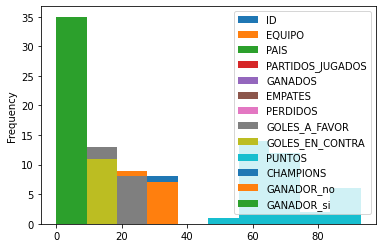

In [61]:
histogram = df.plot.hist()

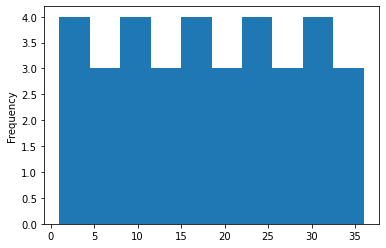

In [62]:
histogram = df.ID.plot.hist()

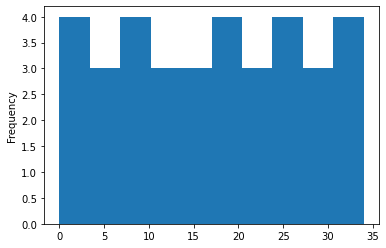

In [63]:
histogram = df.EQUIPO.plot.hist()

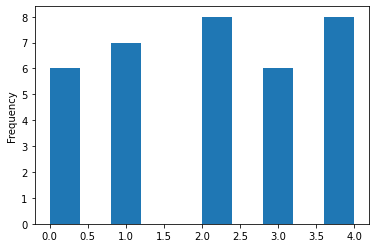

In [64]:
histogram = df.PAIS.plot.hist()

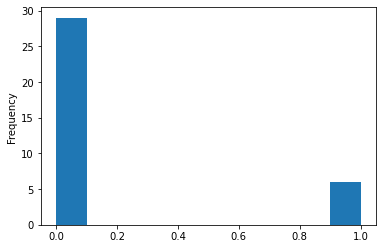

In [65]:
histogram = df.PARTIDOS_JUGADOS.plot.hist()

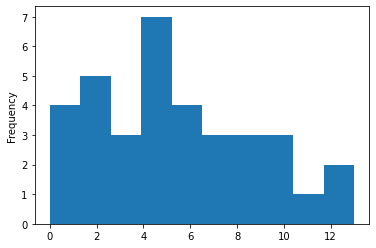

In [66]:
histogram = df.GANADOS.plot.hist()

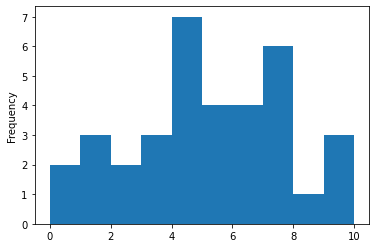

In [67]:
histogram = df.EMPATES.plot.hist()

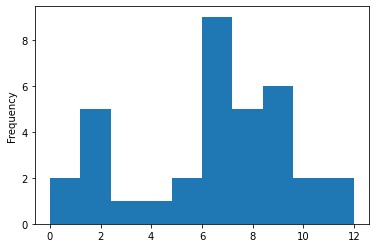

In [68]:
histogram = df.PERDIDOS.plot.hist()

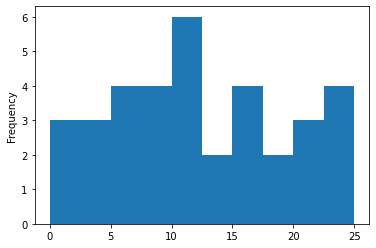

In [69]:
histogram = df.GOLES_A_FAVOR.plot.hist()

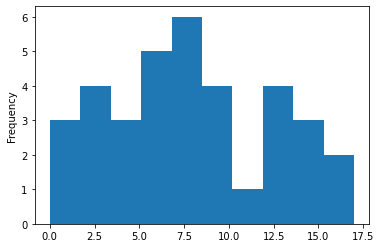

In [70]:
histogram = df.GOLES_EN_CONTRA.plot.hist()

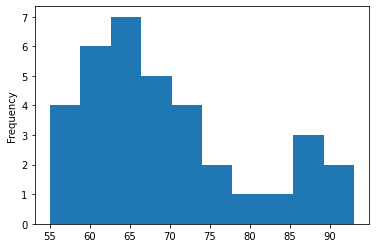

In [71]:
histogram = df.PUNTOS.plot.hist()

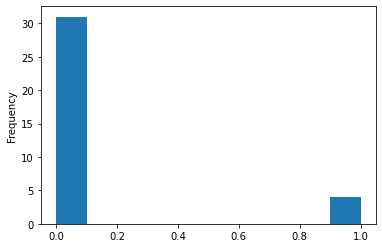

In [72]:
histogram = df.GANADOR_si.plot.hist()

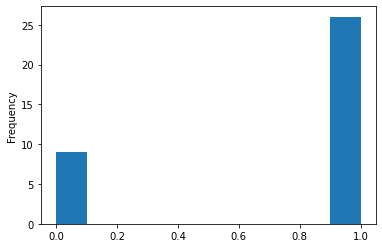

In [73]:
histogram = df.GANADOR_no.plot.hist()

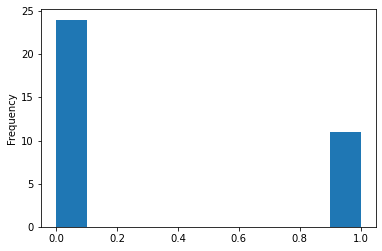

In [74]:
histogram = df.CHAMPIONS.plot.hist()

In [75]:
df.columns


Index(['ID', 'EQUIPO', 'PAIS', 'PARTIDOS_JUGADOS', 'GANADOS', 'EMPATES',
       'PERDIDOS', 'GOLES_A_FAVOR', 'GOLES_EN_CONTRA', 'PUNTOS', 'CHAMPIONS',
       'GANADOR_no', 'GANADOR_si'],
      dtype='object')

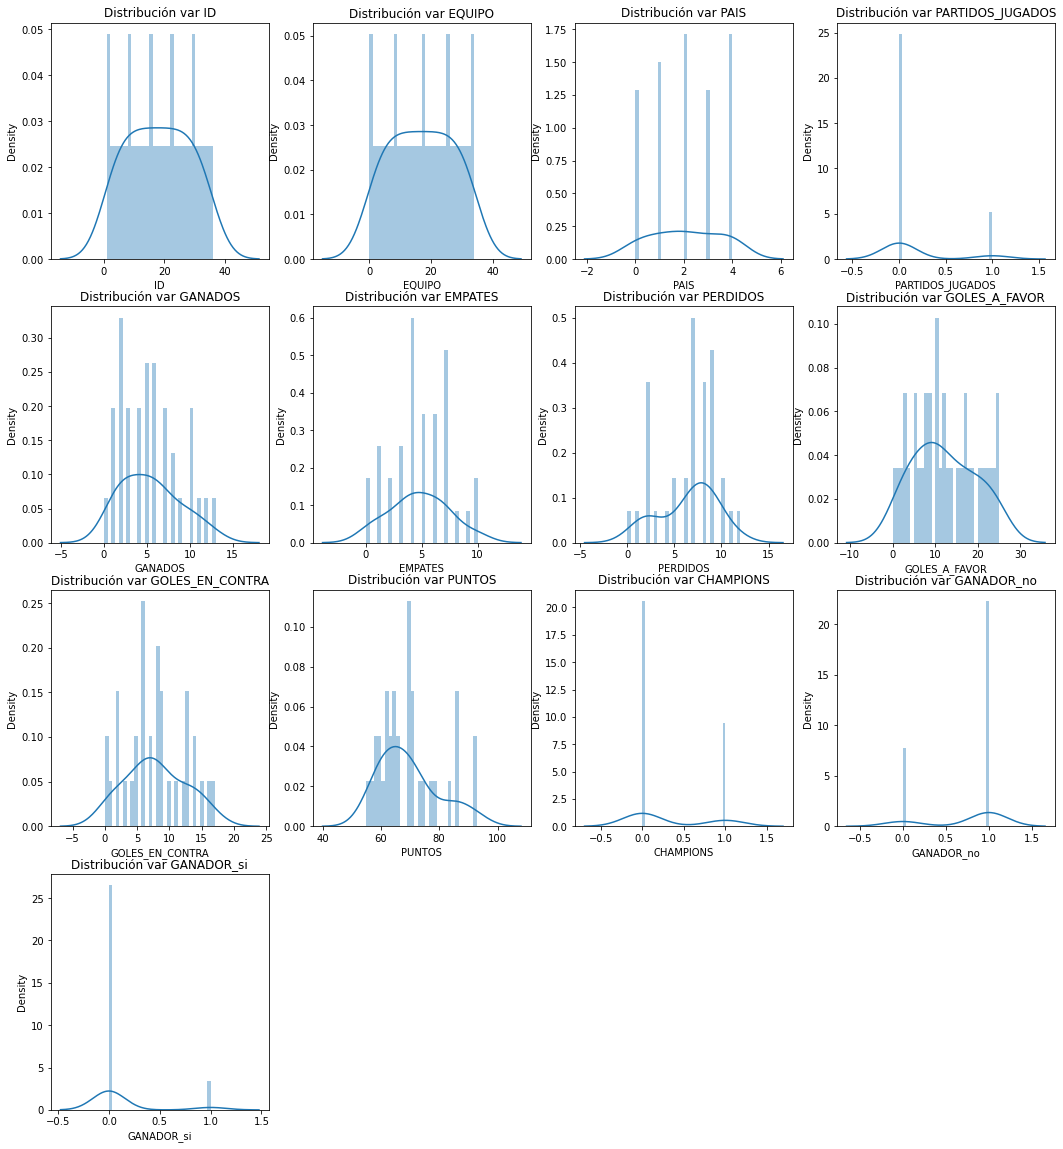

In [76]:
plt.figure(figsize=(18,20))
n = 0
for i, column in enumerate(df.columns):
    n+=1
    plt.subplot(4, 4, n)
    try:
        sns.distplot(df[column], bins=30)
    except:
        pass
    plt.title('Distribución var {}'.format(column))
plt.show()

In [77]:
numerics = ['int16','int32','int64','float16','float32','float64']
variables_numericas = df.select_dtypes(include=numerics)
variables_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                35 non-null     int64
 1   PAIS              35 non-null     int64
 2   PARTIDOS_JUGADOS  35 non-null     int64
 3   GANADOS           35 non-null     int64
 4   EMPATES           35 non-null     int64
 5   PERDIDOS          35 non-null     int64
 6   GOLES_A_FAVOR     35 non-null     int64
 7   GOLES_EN_CONTRA   35 non-null     int64
 8   PUNTOS            35 non-null     int64
 9   CHAMPIONS         35 non-null     int64
dtypes: int64(10)
memory usage: 2.9 KB


### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 5.- Aplica el test de Shapiro


In [78]:
from scipy.stats import shapiro
for columna_numerica in variables_numericas.columns:
    stat, p = shapiro(df[columna_numerica])
    
    print('Valor de test=%.3f, p-value=%.3f' % (stat,p))
    
    alpha=0.05
    if p > alpha:
        print('La variable ',columna_numerica,' proviene de una distribución normal (rechazamos H0), por lo tanto H1')
    else:
        print('La variable ',columna_numerica,' no proviene de una distribución normal (rechazamos H0) por lo tanto H1')

Valor de test=0.960, p-value=0.234
La variable  ID  proviene de una distribución normal (rechazamos H0), por lo tanto H1
Valor de test=0.891, p-value=0.002
La variable  PAIS  no proviene de una distribución normal (rechazamos H0) por lo tanto H1
Valor de test=0.458, p-value=0.000
La variable  PARTIDOS_JUGADOS  no proviene de una distribución normal (rechazamos H0) por lo tanto H1
Valor de test=0.956, p-value=0.176
La variable  GANADOS  proviene de una distribución normal (rechazamos H0), por lo tanto H1
Valor de test=0.969, p-value=0.406
La variable  EMPATES  proviene de una distribución normal (rechazamos H0), por lo tanto H1
Valor de test=0.933, p-value=0.034
La variable  PERDIDOS  no proviene de una distribución normal (rechazamos H0) por lo tanto H1
Valor de test=0.960, p-value=0.230
La variable  GOLES_A_FAVOR  proviene de una distribución normal (rechazamos H0), por lo tanto H1
Valor de test=0.968, p-value=0.393
La variable  GOLES_EN_CONTRA  proviene de una distribución normal (re

### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 6.- Dibula el gráfico de la matriz de correlación

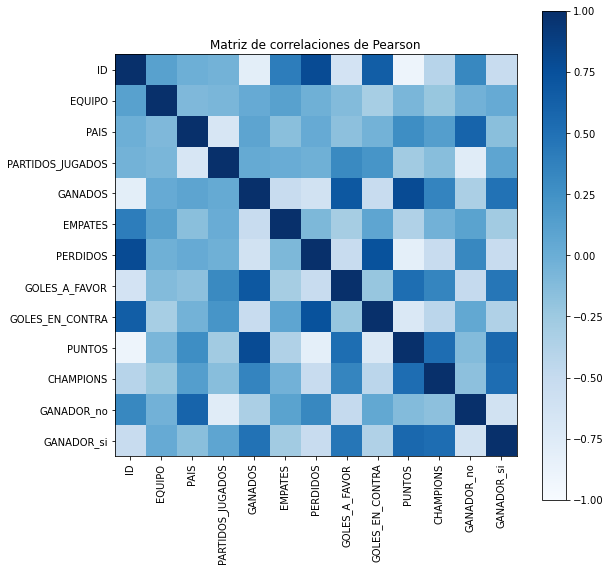

In [79]:
matriz_correlaciones = df.corr(method='pearson')
n_ticks = len(df.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), df.columns, rotation='vertical')
plt.yticks(range(n_ticks), df.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 7.- Normaliza los datos numéricos y divídelos en train y test

In [80]:
X = df.drop('CHAMPIONS', axis=1)
Y = df['CHAMPIONS']

correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}

for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
GANADOR_si,-0.610541
PUNTOS,0.568771
GANADOR_no,0.530589
PERDIDOS,-0.527290
ID,-0.523076
GANADOS,0.485395
GOLES_A_FAVOR,0.454391
GOLES_EN_CONTRA,-0.360332
EMPATES,-0.279530
PAIS,-0.150126


In [81]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 8.- Aplica el modelo de Regresión Logística, umbraliza los datos y matriz de confusión

In [82]:
modelo = LogisticRegression()
parametros = {"C": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}

modelo_gs = GridSearchCV(modelo, param_grid=parametros,cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                               0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [83]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.01, 'class_weight': 'balanced'} 
ROC AUC: 0.82


In [84]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.01, class_weight='balanced')

In [85]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))

Matriz de confusión
 [[6 0]
 [1 0]]

Accuracy	0.86
Sensitividad	0.0
Precisión	0.0


### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 9.- Aplica el modelo de Arboles de Decisión, umbraliza los datos y matriz de confusión

In [86]:
regr = DecisionTreeRegressor()
params = {"max_depth": range(3, 7)}
regr_opt = GridSearchCV(regr, params, cv=3)
regr_opt.fit(X_train, Y_train)
print('El mejor estimador es: {}'.format(regr_opt.best_estimator_))

El mejor estimador es: DecisionTreeRegressor(max_depth=4)


In [87]:
y_test_pred = regr_opt.predict(X_test)
y_test_pred.shape

(7,)

In [88]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred[:] > umbral)

Y_test.shape

(7,)

In [89]:
Y_test

29    0
20    0
16    1
28    0
22    0
15    0
10    0
Name: CHAMPIONS, dtype: int64

In [90]:
y_umbralizadas.shape

(7,)

In [91]:
y_umbralizadas

array([0, 0, 0, 0, 0, 0, 1])

In [92]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[5 1]
 [1 0]]


### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 10.- Aplica el modelo de KNN Vecinos , umbraliza los datos y matriz de confusión

In [93]:
y_ruido = np.sin(X_train)[:, 0] + np.random.normal(size=X_train.shape[0],scale=0.20)

x_train2=X_train[:,0]

clf = KNeighborsRegressor()
params = {"n_neighbors": range(1, 20)}

clf_gs = GridSearchCV(clf, params, cv=3)
clf_gs.fit(X_train, Y_train)
print('El mejor estimador es: {}'.format(clf_gs.best_estimator_))

El mejor estimador es: KNeighborsRegressor(n_neighbors=4)


In [94]:
y_test_predict=clf_gs.predict(X_test)

umbral = 0.6
y_umbralizadas = 1*(y_test_predict[:] > umbral)

print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[6 0]
 [1 0]]


### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 11.- Aplica el modelo clustering no jerárquico K-medias

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


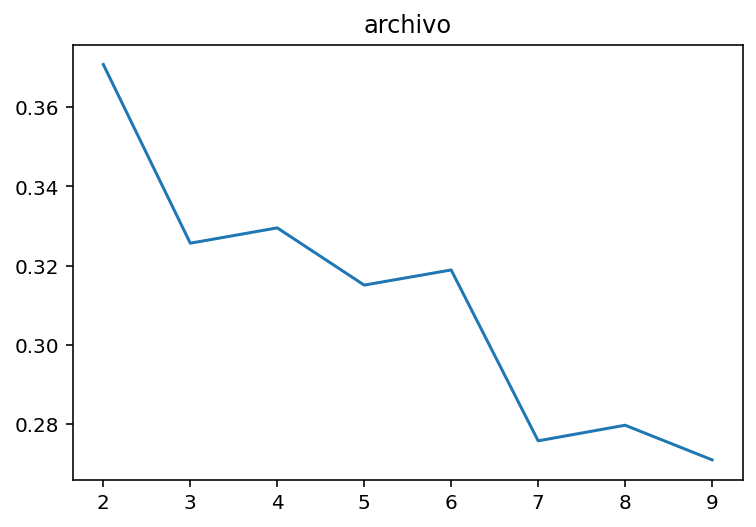

In [102]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


df.head()

col_names = list(df.columns)
col_names.remove('CHAMPIONS')

Granja = df[col_names]

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)
    
plot_sillhouette(df, 'archivo')

### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 12.- Aplica el modelo clustering jerárquico

In [106]:
# · Importo librerías

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np



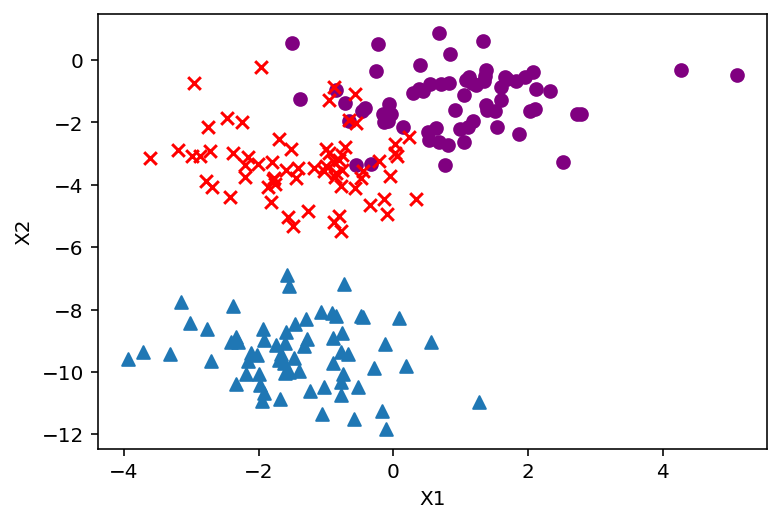

In [109]:
# Defino una función para representar el dendograma
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    fig = plt.figure(figsize=(20,3))
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
X, y = make_blobs(centers=3, random_state=2, n_samples=200)

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Clase Y=0", marker="^") 
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Clase Y=1", c="purple", marker="o")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=40, label="Clase Y=2", c="red", marker="x")
plt.xlabel("X1") 
plt.ylabel("X2") 
plt.show()


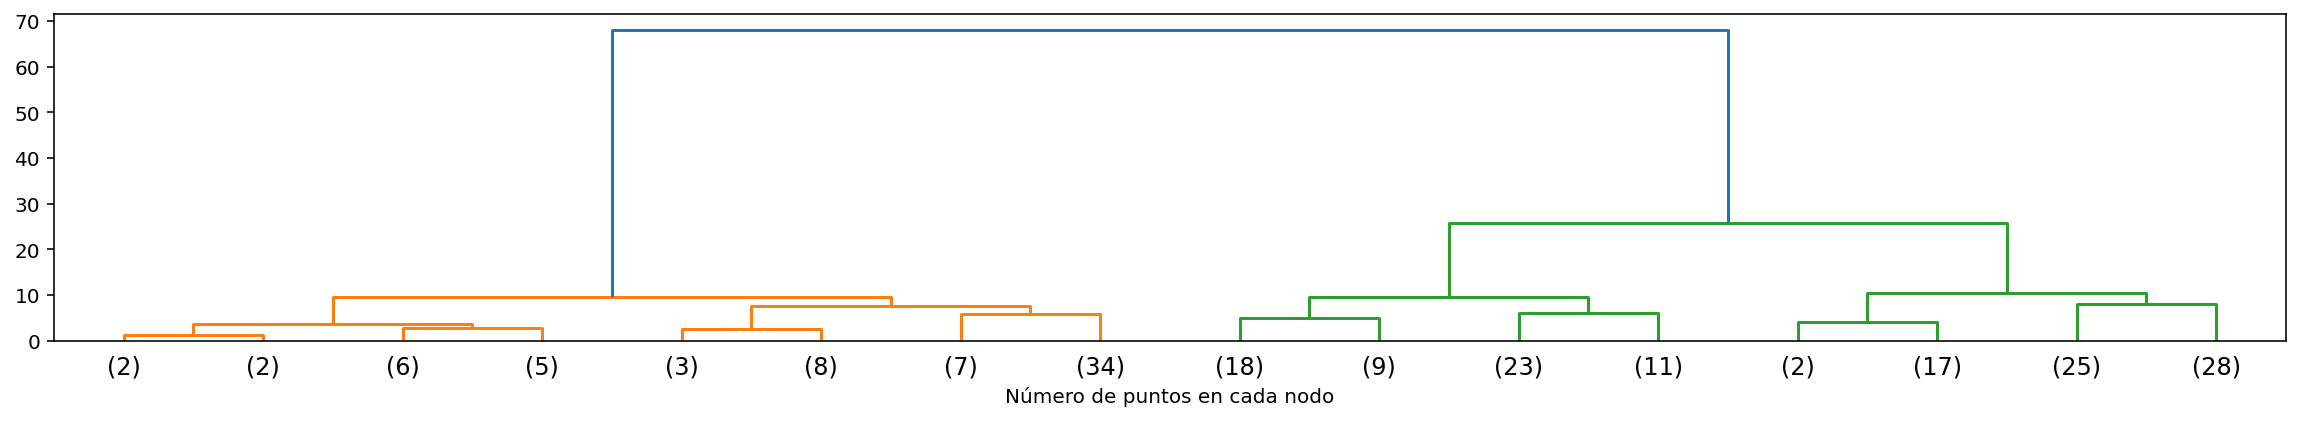

In [111]:
# Ajusto el clustering sólamente a los datos X
dfX = pd.DataFrame(X, columns=['X1', 'X2'])
cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=0)
cluster.fit(dfX)



# Represento el dendograma
plot_dendrogram(cluster, truncate_mode='level', p=3)
plt.xlabel(u"Número de puntos en cada nodo")
plt.show()


In [112]:
# Fuerzo a que haya 3 clústers
dfX = pd.DataFrame(X, columns=['X1', 'X2'])
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward', distance_threshold=None)
cluster.fit(dfX)



AgglomerativeClustering(n_clusters=3)

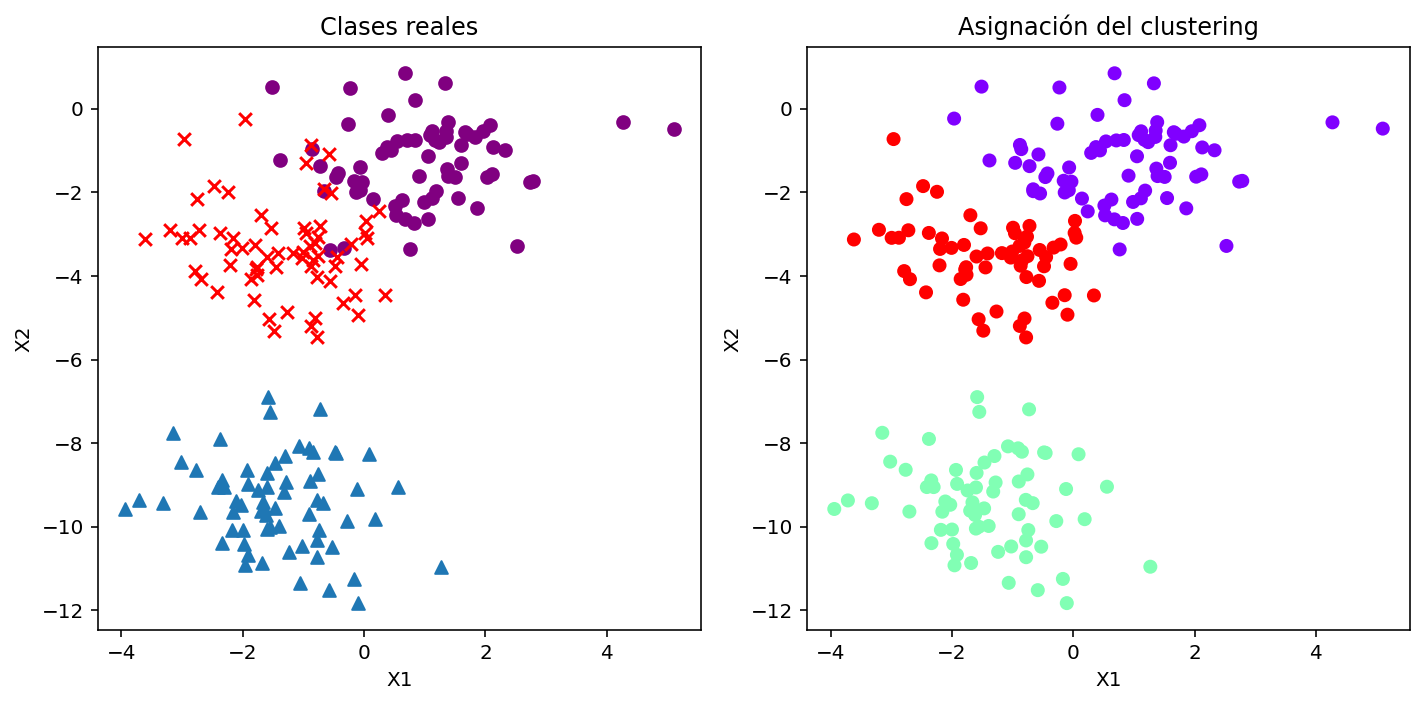

In [114]:
# Representaciones
plt.figure(figsize=(10, 5))
# Represento las clases reales
plt.subplot(121)
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Clase Y=0", marker="^") 
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Clase Y=1", c="purple", marker="o")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=40, label="Clase Y=2", c="red", marker="x")
plt.xlabel("X1") 
plt.ylabel("X2")
plt.title("Clases reales")

# Represento el resultado del clústering con k=3
plt.subplot(122)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(u"Asignación del clustering")
plt.tight_layout()
plt.show()



### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 13.- Aplica el modelo de análisis de componentes principales PCA

In [116]:
# Importo librerías
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [127]:
print(u'El número total de variables de este dataset es: {}'.format(X.shape[1]))

scaler = StandardScaler()
X_escaladas = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_escaladas)

El número total de variables de este dataset es: 12


PCA()

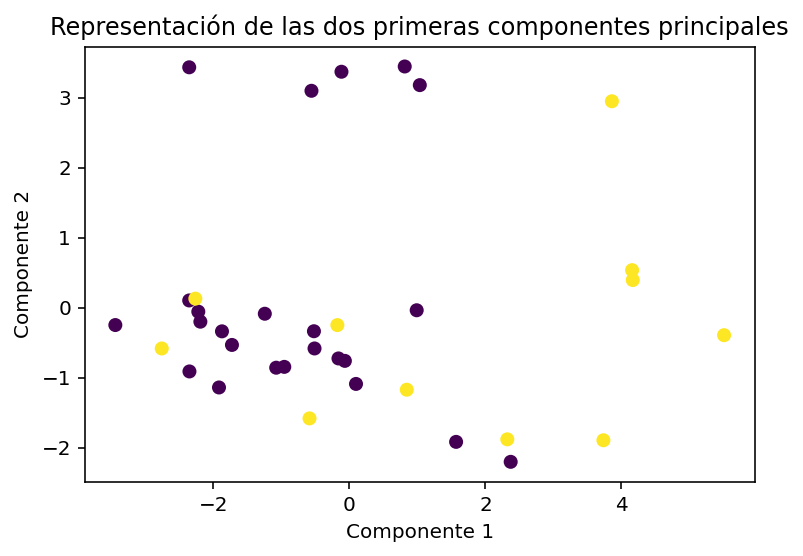

In [129]:
# Ajusto el PCA con 2 componentes
pca = PCA(n_components=2)
pca.fit(X_escaladas)
comp_principales = pca.transform(X_escaladas)

plt.scatter(comp_principales[:, 0], comp_principales[:, 1], c=Y)
plt.title(u'Representación de las dos primeras componentes principales')
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 14.- Aplica el modelo de análisis factorial

In [130]:
# Importo librerías
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer # pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt

In [131]:
archivo= "EXAMEN_Alfredo.csv"
df = pd.read_csv(fich, encoding='latin-1')
df

,ID,EQUIPO,PAIS,PARTIDOS_JUGADOS,GANADOS,EMPATES,PERDIDOS,GOLES_A_FAVOR,GOLES_EN_CONTRA,PUNTOS,GANADOR,CHAMPIONS
0,1,Manchester City,INGLATERRA,38.0,29.0,6.0,3,99.0,26,93,si,si
1,2,Liverpool,INGLATERRA,38.0,28.0,8.0,2,94.0,26,92,no,si
2,3,Bayern Munich,ALEMANIA,NaN,24.0,5.0,5,97.0,37,77,si,si
3,4,Paris S-G,FRANCIA,38.0,26.0,8.0,4,90.0,36,86,si,si
4,5,Real Madrid,ESPAÃA,38.0,26.0,8.0,4,80.0,31,86,si,si
5,6,Milan,ITALIA,38.0,26.0,8.0,4,69.0,31,86,no,no
6,7,Inter,ITALIA,38.0,25.0,9.0,4,84.0,32,84,no,si
7,8,Napoli,ITALIA,38.0,24.0,7.0,7,74.0,31,79,no,no
8,9,Dortmund,ALEMANIA,NaN,22.0,3.0,9,85.0,52,69,NaN,no
9,10,Chelsea,INGLATERRA,38.0,21.0,11.0,6,76.0,33,74,no,si


In [132]:
# Elimino columnas innecesarias
df.drop(['ID', 'EQUIPO', 'PAIS', 'PERDIDOS', 'GOLES_EN_CONTRA', 'PUNTOS', 'GANADOR', 'CHAMPIONS'],axis=1,inplace=True)

In [133]:
df

,PARTIDOS_JUGADOS,GANADOS,EMPATES,GOLES_A_FAVOR
0,38.0,29.0,6.0,99.0
1,38.0,28.0,8.0,94.0
2,NaN,24.0,5.0,97.0
3,38.0,26.0,8.0,90.0
4,38.0,26.0,8.0,80.0
5,38.0,26.0,8.0,69.0
6,38.0,25.0,9.0,84.0
7,38.0,24.0,7.0,74.0
8,NaN,22.0,3.0,85.0
9,38.0,21.0,11.0,76.0


In [134]:
# Elimino filas con valores missings
df.dropna(inplace=True)
df[:2]

,PARTIDOS_JUGADOS,GANADOS,EMPATES,GOLES_A_FAVOR
0,38.0,29.0,6.0,99.0
1,38.0,28.0,8.0,94.0


In [135]:
# Realizo el test de Kaiser-Meyer-Olkin
# Indica cómo de adecuada es la muestra a hacer un análisis factorial
# Los valores entre 0.5 y 1 indican que es apropiado aplicarlo
kmo_all,kmo_model=calculate_kmo(df)
print('El valor KMO es: {}\n[0.5-1] -> Valores adecuados para análisis factorial'.format(round(kmo_model,2)))

El valor KMO es: nan
[0.5-1] -> Valores adecuados para análisis factorial


In [137]:
df

,PARTIDOS_JUGADOS,GANADOS,EMPATES,GOLES_A_FAVOR
0,38.0,29.0,6.0,99.0
1,38.0,28.0,8.0,94.0
3,38.0,26.0,8.0,90.0
4,38.0,26.0,8.0,80.0
5,38.0,26.0,8.0,69.0
6,38.0,25.0,9.0,84.0
7,38.0,24.0,7.0,74.0
9,38.0,21.0,11.0,76.0
12,38.0,22.0,5.0,69.0
13,38.0,21.0,8.0,63.0


In [138]:
df.isnull().sum()

PARTIDOS_JUGADOS    0
GANADOS             0
EMPATES             0
GOLES_A_FAVOR       0
dtype: int64

In [140]:
df.dtypes

PARTIDOS_JUGADOS    float64
GANADOS             float64
EMPATES             float64
GOLES_A_FAVOR       float64
dtype: object

In [146]:
# Ajusto un modelo de análisis factorial a los datos
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(df)

(nan, nan)

In [144]:
# Criterio 1: Kaiser Criterion
# Compruebo los autovalores > 1
ev, v = fa.get_eigenvalues()
print('--- Criterio 1: Kaiser Criterion')
print(u'El número de factores adecuado según el criterio de Kaiser (autovalor>1) es {}'.format(sum(ev>1)))


LinAlgError: Eigenvalues did not converge

In [145]:
# Criterio 2: gráfica de sedimentación
# Compruebo un codo en la gráfica, punto en el que está el
# número de factores
print('\n--- Criterio 2: gráfica de sedimentación')
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title(u'Gráfica de sedimentación')
plt.xlabel('Factor')
plt.ylabel('Autovalor')
plt.axhline(1, c="green")
plt.grid()
plt.show()


--- Criterio 2: gráfica de sedimentación


NameError: name 'ev' is not defined

In [147]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(nan, nan)

In [148]:
# Creo el análisis factorial con 6 factores y analizo los factores
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df)

ValueError: array must not contain infs or NaNs

In [149]:
columnas_factores = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6']
pd.DataFrame(fa.loadings_, index=df.columns, columns=columnas_factores)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
PARTIDOS_JUGADOS,NaN,NaN,NaN,NaN,NaN,NaN
GANADOS,NaN,NaN,NaN,NaN,NaN,NaN
EMPATES,NaN,NaN,NaN,NaN,NaN,NaN
GOLES_A_FAVOR,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
# Obtengo las varianzas de los factores
nombres_varianzas = ['Varianza del factor', 'Proporción de varianza', 'Varianza acumulada']
pd.DataFrame(fa.get_factor_variance(), columns=columnas_factores, index=nombres_varianzas)

AttributeError: 'NoneType' object has no attribute 'copy'

### ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ··· ###

### 15.- Aplica el modelo de red neuronal keras

In [153]:
from tensorflow.keras.optimizers import SGD
# Librerías generales
import pandas as pd
import numpy as np

# Librerías para visualización
%pylab
%matplotlib inline
%config InlineBacked.figure_format='retina'
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Librerías Keras
from keras.models import Sequential
from keras.layers.core import Dense

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [158]:
archivo= "EXAMEN_Alfredo.csv"
df = pd.read_csv(fich, encoding='latin-1')

In [160]:
df.head()

,ID,EQUIPO,PAIS,PARTIDOS_JUGADOS,GANADOS,EMPATES,PERDIDOS,GOLES_A_FAVOR,GOLES_EN_CONTRA,PUNTOS,GANADOR,CHAMPIONS
0,1,Manchester City,INGLATERRA,38.0,29.0,6.0,3,99.0,26,93,si,si
1,2,Liverpool,INGLATERRA,38.0,28.0,8.0,2,94.0,26,92,no,si
2,3,Bayern Munich,ALEMANIA,NaN,24.0,5.0,5,97.0,37,77,si,si
3,4,Paris S-G,FRANCIA,38.0,26.0,8.0,4,90.0,36,86,si,si
4,5,Real Madrid,ESPAÃA,38.0,26.0,8.0,4,80.0,31,86,si,si


In [161]:
df.shape

(35, 12)

In [190]:
input_dim = 1
output_dim = 1

model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))

sgd = SGD(lr=0.0004)
model.compile(loss='mse', optimizer=sgd)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [194]:
num_epochs = 200
batch_size = 5
history = model.fit(X, Y, 
              epochs=num_epochs, 
              batch_size=batch_size, 
              verbose=6)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

In [195]:
sgd = SGD(lr=0.0001)
model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])

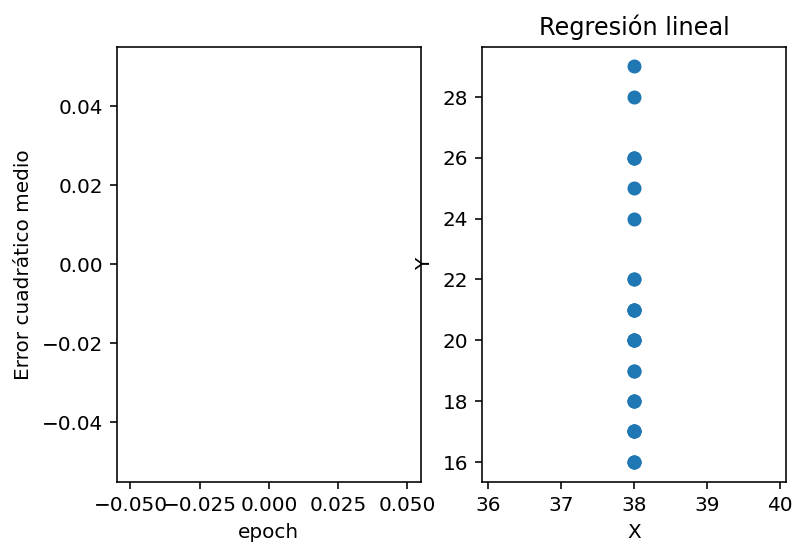

In [196]:

# Graficar el error vs epochs y el resultado de la regresión
# superpuesto a los datos originales
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('Error cuadrático medio')

# Realizamos las predicciones sobre el conjunto X
predicciones_regression = model.predict(X)

plt.subplot(1, 2, 2)
plt.scatter(X,Y)
plt.plot(X, predicciones_regression,'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal')
plt.show()



In [197]:
sgd = SGD(lr=0.0004)
model.compile(loss='mse', optimizer=sgd)

In [198]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


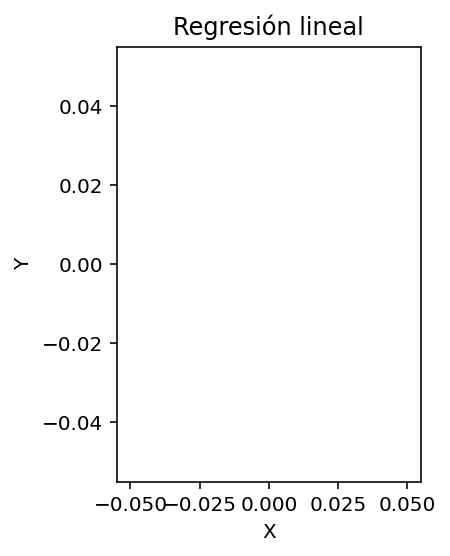

In [199]:
# Realizamos las predicciones sobre el conjunto X
predicciones_regression = model.predict(X)

plt.subplot(1, 2, 2)
plt.plot(X, predicciones_regression,'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal')
plt.show()